In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Load Training Dataset**

In [2]:
##read training dataset
training_data = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')

##display first 5 rows
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


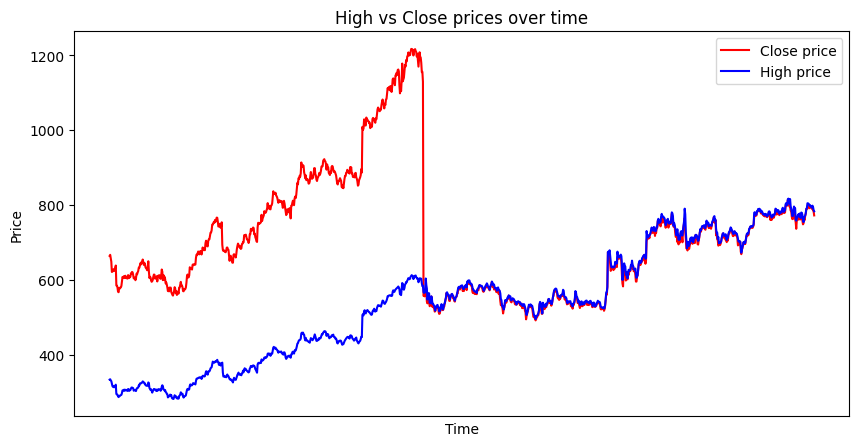

In [3]:
close = training_data['Close'].str.replace(',', '').astype(float)
high = training_data['High']

plt.figure(figsize = (10, 5))
plt.plot(close, color = 'red', label = 'Close price')
plt.plot(high, color = 'blue', label = 'High price')
plt.title("High vs Close prices over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.xticks([])
plt.legend()
plt.show()

**Data Cleaning**

Here, we drop the "Date" and "Close" columns from the training dataset. We drop the close column because we suspect that there might be a data record error on this column as the close column has values which are almost double of the high column which is unrealistic. We also convert the volume feature here from string to float type of data.

In [3]:
##drop Date and Close columns
training_set = training_data.drop(['Date','Close'], axis = 1)

##remove commas at volume column
training_set['Volume'] = training_set['Volume'].str.replace(',', '')

#training_set['Close'] = training_set['Close'].str.replace(',', '')

##display training data
training_set.head()

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500
1,331.27,333.87,329.08,5749400
2,329.83,330.75,326.89,6590300
3,328.34,328.77,323.68,5405900
4,322.04,322.29,309.46,11688800


In [5]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   object 
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


In [4]:
##convert Volume to float
training_set['Volume'] = training_set['Volume'].astype(float)

##display info
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   float64
dtypes: float64(4)
memory usage: 39.4 KB


In [7]:
##check for null values
training_set.isnull().sum()

,0
Open,0
High,0
Low,0
Volume,0


**Data Pre-processing**

We perform MinMax scaling here on the training dataset.

In [5]:
##Data pre-processing
from sklearn.preprocessing import MinMaxScaler

##min-max scaling
scaler = MinMaxScaler()

##fit the scaler object
training_set = scaler.fit_transform(training_set)
training_set

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [9]:
training_set.shape

(1258, 4)

**Read testing dataset**

In [6]:
##read testng data
testing_data = pd.read_csv("/content/drive/MyDrive/Google_Stock_Price_Test.csv")

##display testing data
testing_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


**Data Cleaning**

We perform the same cleaning steps as the training data on the testing set.

In [7]:
##drop Date and Close columns
testing_set = testing_data.drop(['Date', 'Close'], axis = 1)

##remove commas at Volume column
testing_set['Volume'] = testing_set['Volume'].str.replace(',', '')

##display testing set
testing_set.head()

,Open,High,Low,Volume
0,778.81,789.63,775.80,1657300
1,788.36,791.34,783.16,1073000
2,786.08,794.48,785.02,1335200
3,795.26,807.90,792.20,1640200
4,806.40,809.97,802.83,1272400


In [12]:
##display info
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Volume  20 non-null     object 
dtypes: float64(3), object(1)
memory usage: 768.0+ bytes


In [8]:
##convert Volume to float
testing_set['Volume'] = testing_set['Volume'].astype(float)

##display info
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Volume  20 non-null     float64
dtypes: float64(4)
memory usage: 768.0 bytes


In [14]:
##check for null values
testing_set.isnull().sum()

,0
Open,0
High,0
Low,0
Volume,0


In [15]:
testing_set.shape

(20, 4)

**Data Pre-processing**

MinMax scaling is perfomed on the testing set.

In [9]:
##pre-processing

#min-max scaling
testing_set = scaler.fit_transform(testing_set)

testing_set.shape

(20, 4)

**Dataset Preparation**

We prepared the training and testing datasets for our model building here.

In [10]:
##training sets
X_train = []
y_train = []

##time_step = 10

for i in range(10, training_set.shape[0]):
  X_train.append(training_set[i-10:i])
  y_train.append(training_set[i,0])

##convert to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

##print shapes
print(X_train.shape)
print(y_train.shape)

(1248, 10, 4)
(1248,)


In [11]:
##split into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(998, 10, 4)
(998,)
(250, 10, 4)
(250,)


In [13]:
##testing sets
X_test = []
y_test = []

##time_step = 10

for j in range(10, testing_set.shape[0]):
  X_test.append(testing_set[j-10:j])
  y_test.append(testing_set[j, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(10, 10, 4)
(10,)


**Model Building**

We build LSTM model with 4 layers and each layer followed by a dropout layer here.

In [16]:
import keras
##RNN model building
def model_fct(lr, eps):

  ##optimizer
  opt = keras.optimizers.Adam(learning_rate = lr)
  model = Sequential()

  ##add LSTM layers
  ##layer 1
  model.add(LSTM(units = 128, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 4)))
  model.add(Dropout(0.1))

  ##layer 2
  model.add(LSTM(units = 64, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 4)))
  model.add(Dropout(0.2))

  ##layer 3
  model.add(LSTM(units = 32, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 4)))
  model.add(Dropout(0.3))

  ##layer 4
  model.add(LSTM(units = 16, activation='relu', input_shape = (X_train.shape[1], 4)))
  model.add(Dropout(0.4))

  ##output layer
  model.add(Dense(units = 1))

  ##trainig for 100 epochs and batch_size = 32
  ##compile and fit model
  model.compile(optimizer=opt, loss = 'mean_squared_error')

  history = model.fit(X_train, y_train, epochs = eps, batch_size = 32, validation_data = (X_val, y_val), verbose=0)

  return (model, history)

Here, we iterate over possible values for learning rate and choose the best which gives us a model with lowest validation loss.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6324 
val loss for lr = 0.1:  14.515460014343262




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 
val loss for lr = 0.01:  0.005140239838510752




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 
val loss for lr = 0.001:  0.0015133406268432736




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 
val loss for lr = 0.0001:  0.005633485969156027




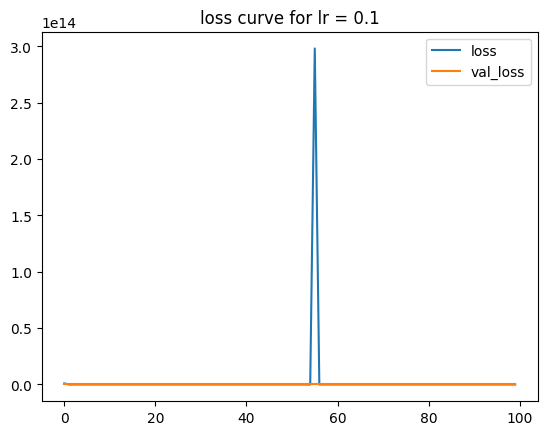

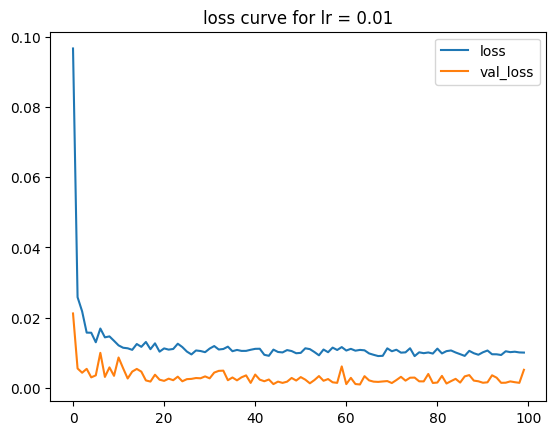

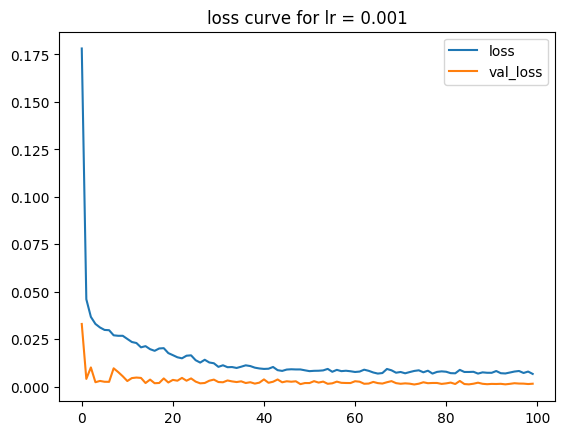

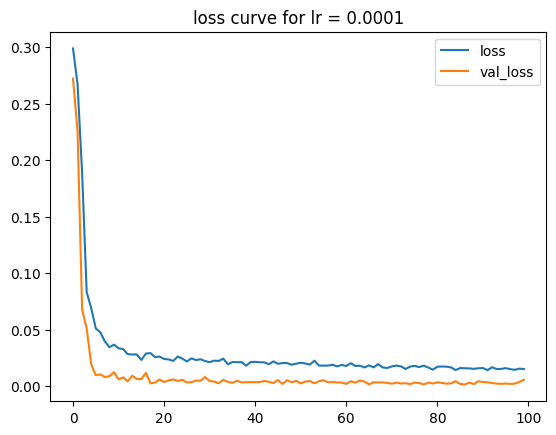

In [17]:
##lr values
lr = [0.1, 0.01, 0.001, 0.0001]

for lr in lr:
  model, history = model_fct(lr, 100)
  val_loss = model.evaluate(X_val, y_val)
  print(f"val loss for lr = {lr}: ", val_loss)
  print("\n")
  pd.DataFrame(history.history).plot(title = f'loss curve for lr = {lr}')

From the outputs in the above cell we get lr = 0.001 with the lowest loss. Now, we have lr = 0.001 and we will search for optimal epoch as follows.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 
val loss for lr = 0.001 and epochs = 100:  0.0014263640623539686




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
val loss for lr = 0.001 and epochs = 150:  0.0011418868089094758




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 
val loss for lr = 0.001 and epochs = 200:  0.0012550504179671407




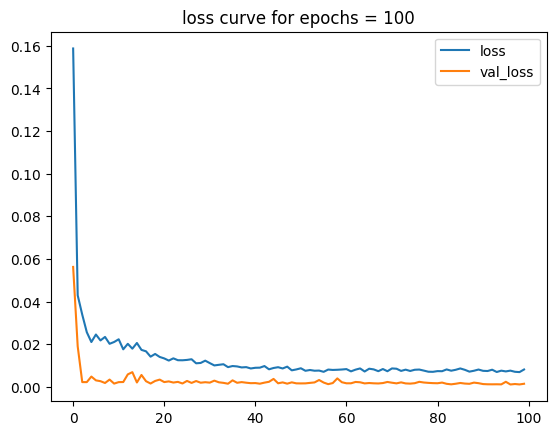

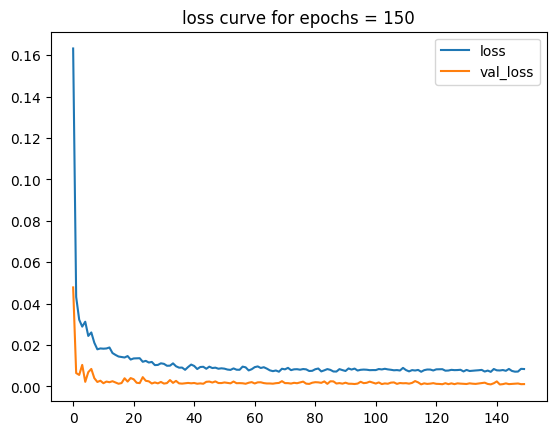

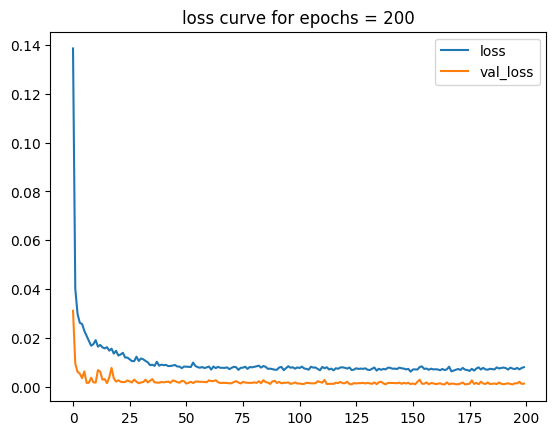

In [18]:
##epochs
eps = [100, 150, 200]

##learning rate
lr = 0.001

for ep in eps:
  model, history = model_fct(lr, ep)
  val_loss = model.evaluate(X_val, y_val)
  print(f"val loss for lr = 0.001 and epochs = {ep}: ", val_loss)
  print("\n")
  pd.DataFrame(history.history).plot(title = f'loss curve for epochs = {ep}')

Here, we determined that the optimal value for epochs is 150. And the LSTM model can now be trained using the optimized hyperparameter values for learning rate and epochs.

In [19]:
lr = 0.001
epochs = 150

##train the LSTM model with the optimized
##hyperparameter values
model, history = model_fct(lr, epochs)
model.evaluate(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 


0.0018303790129721165

<Axes: title={'center': 'loss curve for the best model '}>

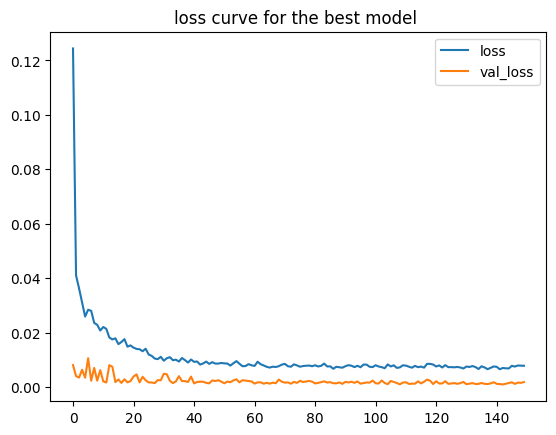

In [20]:
pd.DataFrame(history.history).plot(title = 'loss curve for the best model ')

In [24]:
##model evaluation
model.evaluate(X_val, y_val)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1861e-04


0.0007689283811487257

**Model Prediction**

Prediction on the test data using the trained model is performed here.

In [21]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [22]:
scaler.scale_

array([1.69491525e-02, 1.91131498e-02, 1.95274360e-02, 4.29682465e-07])

In [23]:
scale = 1.69491525e-02

In [24]:
y_pred = y_pred/scale
y_pred

array([[21.354786],
       [24.217113],
       [25.093113],
       [25.865112],
       [27.193794],
       [28.513008],
       [30.93858 ],
       [34.369057],
       [38.374916],
       [40.954777]], dtype=float32)

In [25]:
y_test = y_test/scale
y_test

array([27.00000007, 26.31000007, 28.10000007, 28.44000007, 43.49000011,
       50.81000013, 59.00000015, 55.90000014, 35.85000009, 18.05000005])

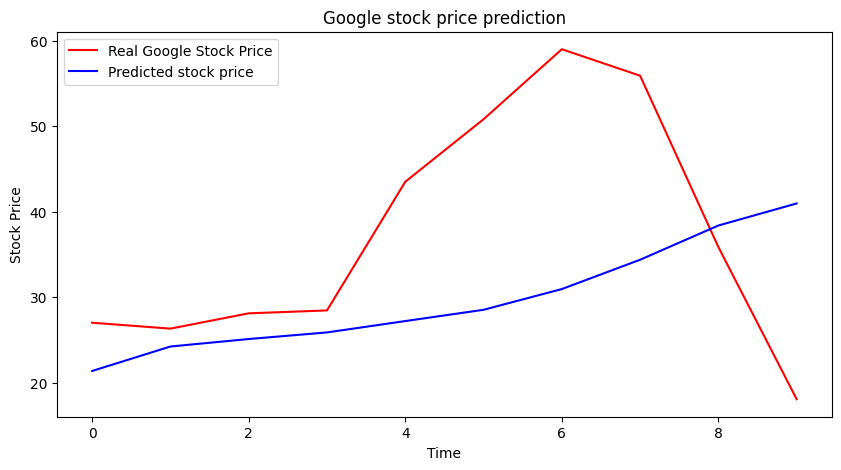

In [26]:
##visualize model prediction
plt.figure(figsize = (10, 5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()